# ***Predicting Flight Ticket price***

**OBJECTIVE**
- Flight ticket prices can be something hard to guess as they are ever changing. This project predicts the price of
flight tickets.

**CONTENTS**
 - Importing libraries
 - Importing dataset
 - Exploratory data analysis
 - Target Distribution
 - Data preprocessing
 - Categorical Data Distribution
 - Models
 - Comparing different models
 - Building Final Model

# Importing Libraries

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# plotting
from sklearn.metrics import plot_roc_curve

# feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Importing dataset

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/PRML/Bonus Project/Copy of Dataset.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Explanatory Data Ananlysis

**Data Overview**

We will see the number of null values in our dataset

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

From the basic data exploration we infer that the two features Route and Total_Stops have 1 missing value.

In [ ]:
df.duplicated().sum()

220

Here we can get more information about our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Checking the different Airlines**

In [ ]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**Checking the different Sources**

In [ ]:
df["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

**Checking the different Destinations**

In [ ]:
df["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

**Checking the Additional_info column and having the count of unique types of values.**

In [ ]:
df["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

As we knew that the total stops feature contains one missing value. Therefore lets print the missing instance.

In [ ]:
df[df["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


# Target Distribution

**We plot a bar plot using the seaborn library to see its variation with the output feature which is the price feature.**

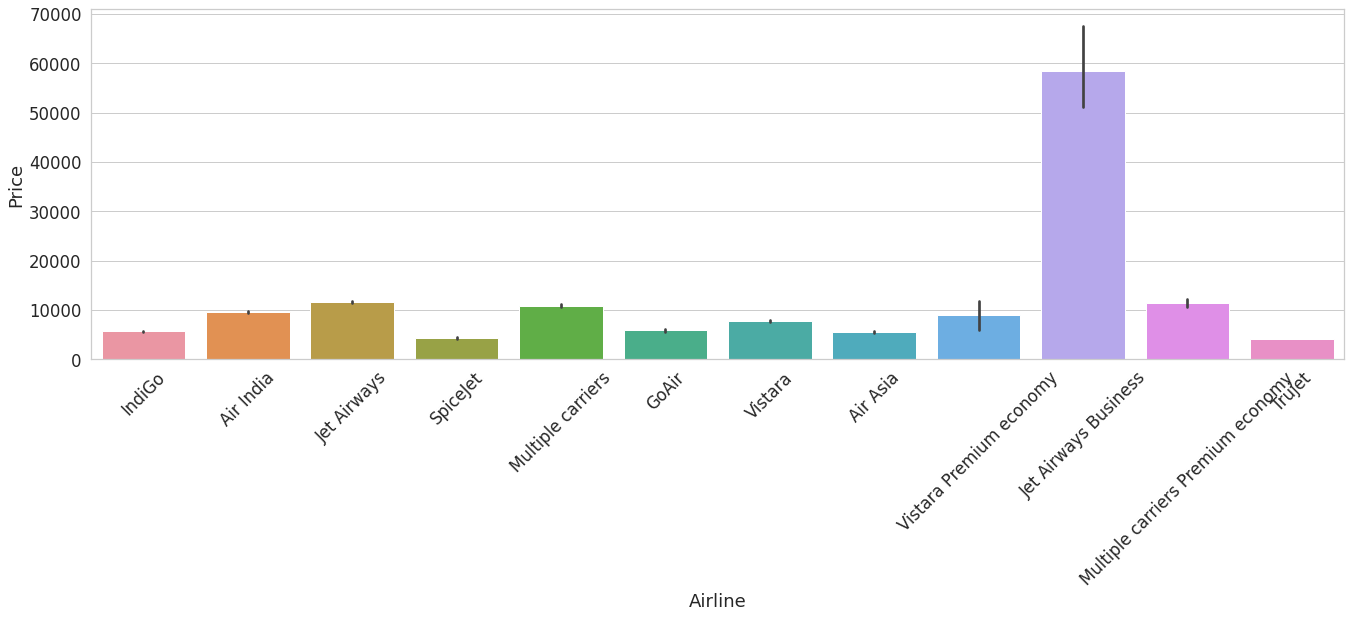

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data = df, x = 'Airline', y='Price')
plt.xticks(rotation=45)
plt.show()

# Preprocessing

**We do the label encoding of these features using the LabelEncoder.** 

In [ ]:
lbl = LabelEncoder()
df["Airline"] = lbl.fit_transform(df["Airline"])
df["Source"] = lbl.fit_transform(df["Source"])
df["Destination"] = lbl.fit_transform(df["Destination"])
df["Additional_Info"] = lbl.fit_transform(df["Additional_Info"])

**We will modify the Duration feature in the dataset.**

In [ ]:
df['Duration'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

**We will change its dtype to datetime64[ns] using pandas in the dataset.**

In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

**Now we will drop the missing instance from the dataset and modify the feature.**

In [ ]:
df = df[df["Total_Stops"].notnull()]

**We will drop the missing instance from the dataset and modify this feature.**


In [ ]:
df["Total_Stops"] = df["Total_Stops"].str[0]
df["Total_Stops"] = df["Total_Stops"].apply(lambda x : str(x) if str(x).isdigit() else 0).astype("int64")

# Categorical Data Distribution

**Now we will make two new columns weekday and month and perform the label encoding**

**Weekday Column**

Barplot describing the relation of a weekday with the price.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


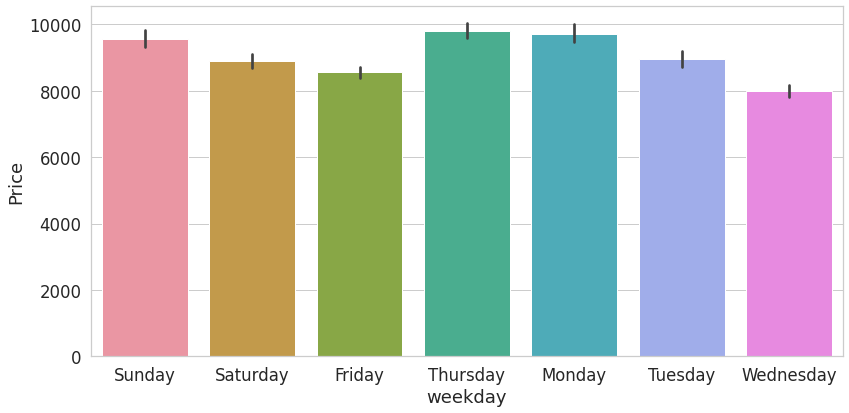

In [ ]:
df['weekday'] = df['Date_of_Journey'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='weekday', y='Price')
plt.show()

df['weekday'] = lbl.fit_transform(df['weekday'])

**Month column**


Barplot describing the relation of the month with the price.

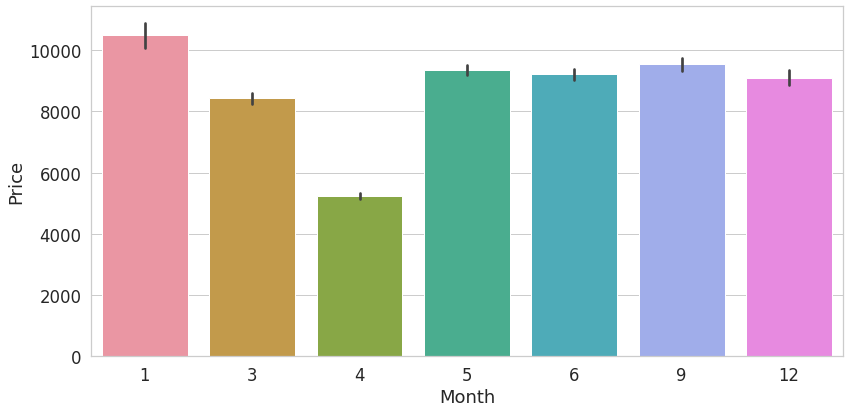

In [ ]:
df['Month'] = df['Date_of_Journey'].dt.month

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Price')
plt.show()

Now we will drop the features which will take part in building our model.


In [ ]:
df.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

Before we go own building our model let us first reorder our columns

In [ ]:
df = df[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Additional_Info', 'weekday', 'Month', 'Price']]

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,weekday,Month,Price
0,3,0,5,170,0,8,3,3,3897
1,1,3,0,445,2,8,2,1,7662
2,4,2,1,1140,2,8,0,9,13882
3,3,3,0,325,1,8,4,12,6218
4,3,0,5,285,1,8,4,1,13302


**Visualization by plotting heatmap using the seaborn library.**

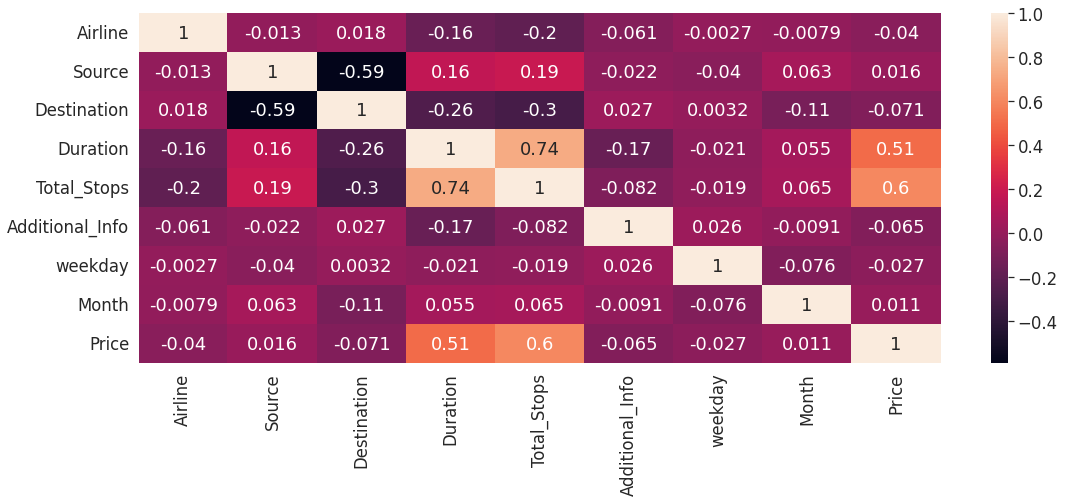

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

# MODELS

**We will split the dataset into the input and the output values.**

In [ ]:
array = df.values
X = array[:, 0:8]
Y = array[:, 8]

**Now we will rescale the data using a normalizer.**

In [ ]:
nz = Normalizer()
rescaled_X = nz.fit_transform(X)
rescaled_X

array([[0.01761175, 0.        , 0.02935291, ..., 0.04696466, 0.01761175,
        0.01761175],
       [0.00224672, 0.00674016, 0.        , ..., 0.01797376, 0.00449344,
        0.00224672],
       [0.00350854, 0.00175427, 0.00087714, ..., 0.00701708, 0.        ,
        0.00789422],
       ...,
       [0.02218664, 0.        , 0.01109332, ..., 0.04437329, 0.01109332,
        0.02218664],
       [0.06225004, 0.        , 0.03112502, ..., 0.04980003, 0.02490002,
        0.006225  ],
       [0.00199932, 0.00399863, 0.00199932, ..., 0.01599453, 0.00799727,
        0.01799385]])

**Splitting the dataset into testing and training set using the train test split.**


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(rescaled_X, Y, test_size=0.20, random_state=1)

In [ ]:
r2_list = dict()
rmse_list = dict()
mae_list = dict()
mape_list = dict()

Now we will use different regression algorithms and see their accuracy, root mean square error, mean absolute error and mean absolute percentage error. We will also plot the ground true values alongwith the predicted values for each model.

**Logistic Regressor**

In [ ]:
logr = LogisticRegression()
logr = logr.fit(x_train, y_train)
accuracylogr = logr.score(x_test, y_test)
print('%s : %f'%("LogisticRegression", accuracylogr*100))
y_pred = logr.predict(x_test)
r2_list["logistic_regression"] = r2_score(y_test, y_pred)
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
rmse_list["logistic_regression"] = mean_squared_error(y_test, y_pred)
print("MAE = ", mean_absolute_error(y_test, y_pred))
mae_list["logistic_regression"] = mean_absolute_error(y_test, y_pred)
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))
mape_list["logistic_regression"] = mean_absolute_percentage_error(y_test, y_pred)

LogisticRegression : 2.807674
RMSE =  4366.9992963668865
MAE =  3450.9171736078615
MAPE =  0.5177679443839001


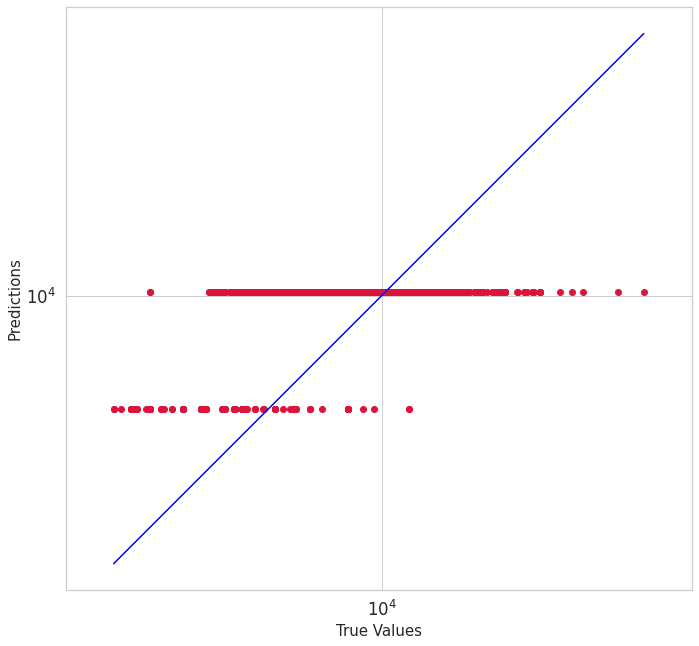

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Linear Regressor**

In [ ]:
linr = LinearRegression()
linr = linr.fit(x_train, y_train)
accuracylinr = linr.score(x_test, y_test)
print('%s : %f'%("LinearRegression", accuracylinr*100))
y_pred = linr.predict(x_test)
r2_list["linear_regression"] = r2_score(y_test, y_pred)
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
rmse_list["linear_regression"] = mean_squared_error(y_test, y_pred)
print("MAE = ", mean_absolute_error(y_test, y_pred))
mae_list["linear_regression"] = mean_absolute_error(y_test, y_pred)
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))
mape_list["linear_regression"] = mean_absolute_percentage_error(y_test, y_pred)

LinearRegression : 40.889897
RMSE =  3481.9377186852175
MAE =  2504.71488461256
MAPE =  0.3095701546712347


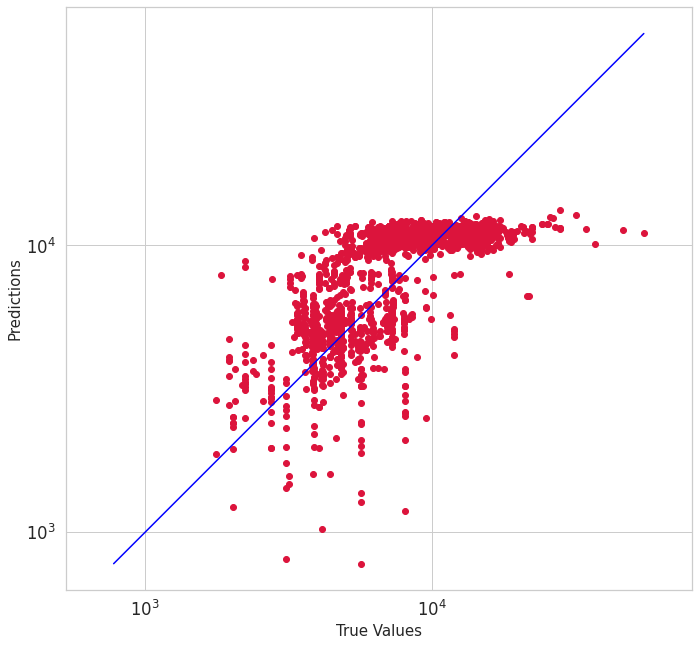

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Decision Tree Regressor**

In [ ]:
dtr = DecisionTreeRegressor()
dtr = dtr.fit(x_train, y_train)
accuracydtr = dtr.score(x_test, y_test)
print('%s : %f'%("DecisionTreeRegressor", accuracydtr*100))
y_pred = dtr.predict(x_test)
r2_list["decisiontree_regressor"] = r2_score(y_test, y_pred)
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
rmse_list["decisiontree_regressor"] = mean_squared_error(y_test, y_pred)
print("MAE = ", mean_absolute_error(y_test, y_pred))
mae_list["decisiontree_regressor"] = mean_absolute_error(y_test, y_pred)
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))
mape_list["decisiontree_regressor"] = mean_absolute_percentage_error(y_test, y_pred)

DecisionTreeRegressor : 60.664248
RMSE =  2840.428555904699
MAE =  1456.8735127725183
MAPE =  0.1641588550922354


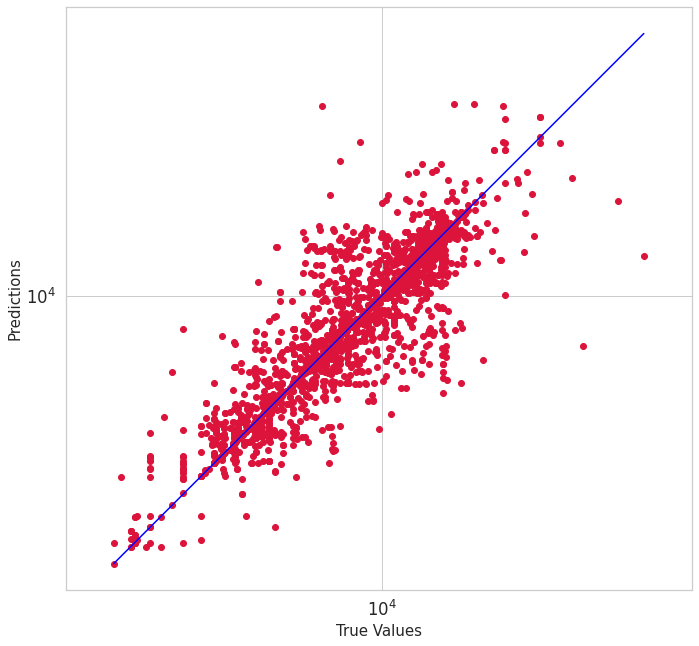

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Random Forest Regressor**

In [ ]:
rfr = RandomForestRegressor()
rfr = rfr.fit(x_train, y_train)
accuracyrfr = rfr.score(x_test, y_test)
print('%s : %f'%("RandomForestRegressor", accuracyrfr*100))
y_pred = rfr.predict(x_test)
r2_list["randomforest_regressor"] = r2_score(y_test, y_pred)
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
rmse_list["randomforest_regressor"] = mean_squared_error(y_test, y_pred)
print("MAE = ", mean_absolute_error(y_test, y_pred))
mae_list["randomforest_regressor"] = mean_absolute_error(y_test, y_pred)
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))
mape_list["randomforest_regressor"] = mean_absolute_percentage_error(y_test, y_pred)

RandomForestRegressor : 73.683805
RMSE =  2323.280735587767
MAE =  1269.3588175664554
MAPE =  0.14896772641655195


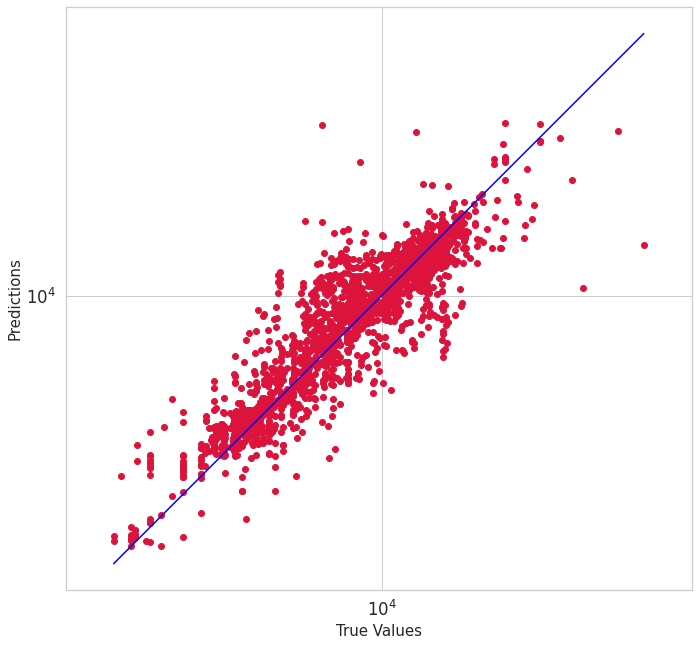

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Gaussian Naive Bayes**

In [ ]:
g = GaussianNB()
g = g.fit(x_train, y_train)
accuracyg = g.score(x_test, y_test)
print('%s : %f'%("GaussianNB", accuracyg*100))
y_pred = g.predict(x_test)
r2_list["gaussian"] = r2_score(y_test, y_pred)
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
rmse_list["gaussian"] = mean_squared_error(y_test, y_pred)
print("MAE = ", mean_absolute_error(y_test, y_pred))
mae_list["gaussian"] = mean_absolute_error(y_test, y_pred)
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))
mape_list["gaussian"] = mean_absolute_percentage_error(y_test, y_pred)

GaussianNB : 14.506317
RMSE =  3351.8848129449925
MAE =  2029.2517547964437
MAPE =  0.2214456923469686


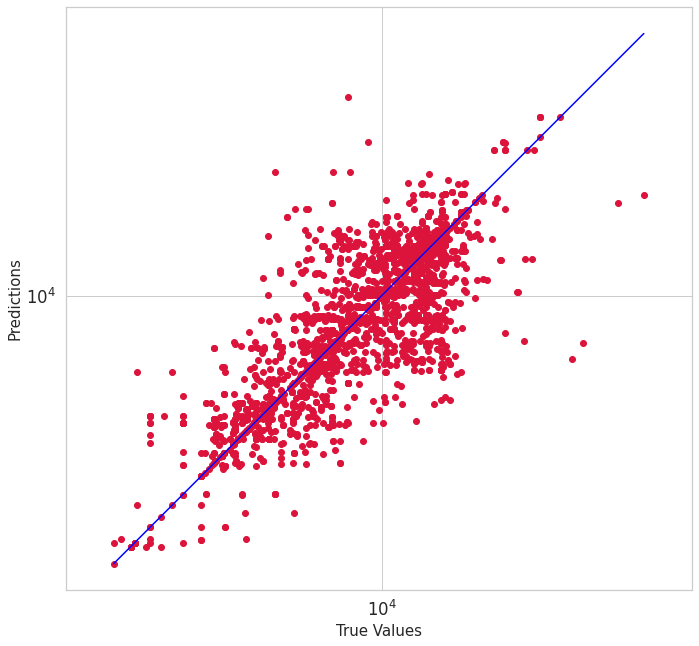

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Bernoulli Naive Bayes**

In [ ]:
b = BernoulliNB()
b = b.fit(x_train, y_train)
accuracyb = b.score(x_test, y_test)
print('%s : %f'%("BernoulliNB", accuracyb*100))
y_pred = b.predict(x_test)
r2_list["bernoulli"] = r2_score(y_test, y_pred)
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
rmse_list["bernoulli"] = mean_squared_error(y_test, y_pred)
print("MAE = ", mean_absolute_error(y_test, y_pred))
mae_list["bernoulli"] = mean_absolute_error(y_test, y_pred)
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))
mape_list["bernoulli"] = mean_absolute_percentage_error(y_test, y_pred)

BernoulliNB : 10.060833
RMSE =  3775.2206611327147
MAE =  2607.831071595695
MAPE =  0.30643349764262345


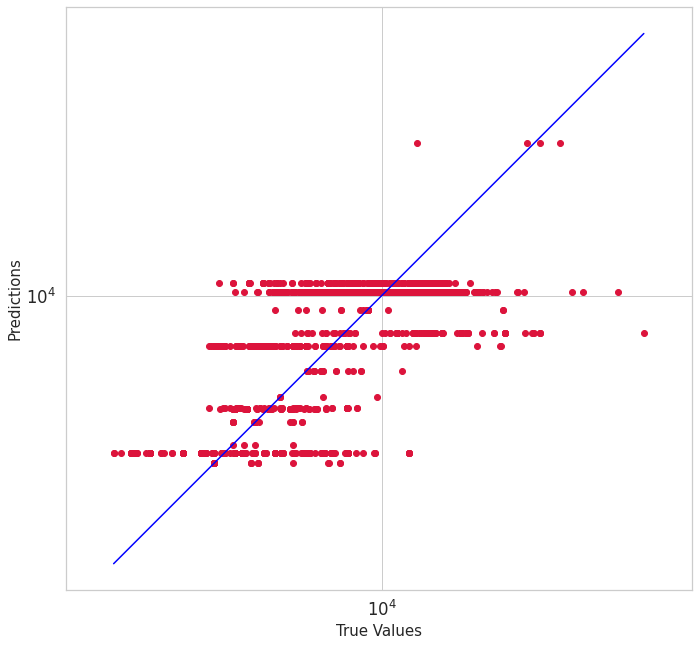

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Multinomial Naive Bayes**

In [ ]:
m = MultinomialNB()
m = m.fit(x_train, y_train)
accuracym = m.score(x_test, y_test)
print('%s : %f'%("Multinomial", accuracym*100))
y_pred = m.predict(x_test)
r2_list["multinomial"] = r2_score(y_test, y_pred)
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
rmse_list["multinomial"] = mean_squared_error(y_test, y_pred)
print("MAE = ", mean_absolute_error(y_test, y_pred))
mae_list["multinomial"] = mean_absolute_error(y_test, y_pred)
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))
mape_list["multinomial"] = mean_absolute_percentage_error(y_test, y_pred)

Multinomial : 2.807674
RMSE =  4664.155712157684
MAE =  3768.561534861956
MAPE =  0.623403235611205


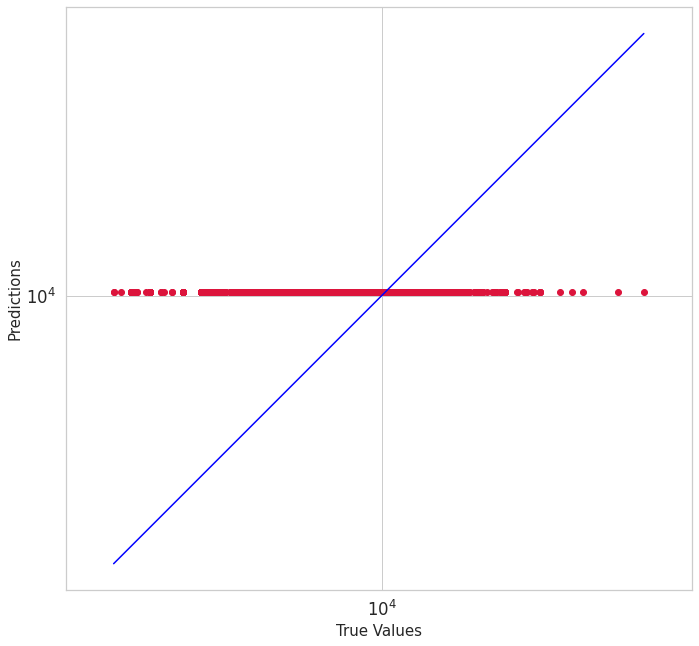

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**K Neighbors Regressor**

In [ ]:
knnr = KNeighborsRegressor()
knnr = knnr.fit(x_train, y_train)
accuracyknnr = knnr.score(x_test, y_test)
print('%s : %f'%("kNeighborsRegressor", accuracyknnr*100))
y_pred = knnr.predict(x_test)
r2_list["kneighbors"] = r2_score(y_test, y_pred)
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
rmse_list["kneighbors"] = mean_squared_error(y_test, y_pred)
print("MAE = ", mean_absolute_error(y_test, y_pred))
mae_list["kneighbors"] = mean_absolute_error(y_test, y_pred)
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))
mape_list["kneighbors"] = mean_absolute_percentage_error(y_test, y_pred)

kNeighborsRegressor : 70.435982
RMSE =  2462.4752320178486
MAE =  1454.286008423023
MAPE =  0.1679632670562746


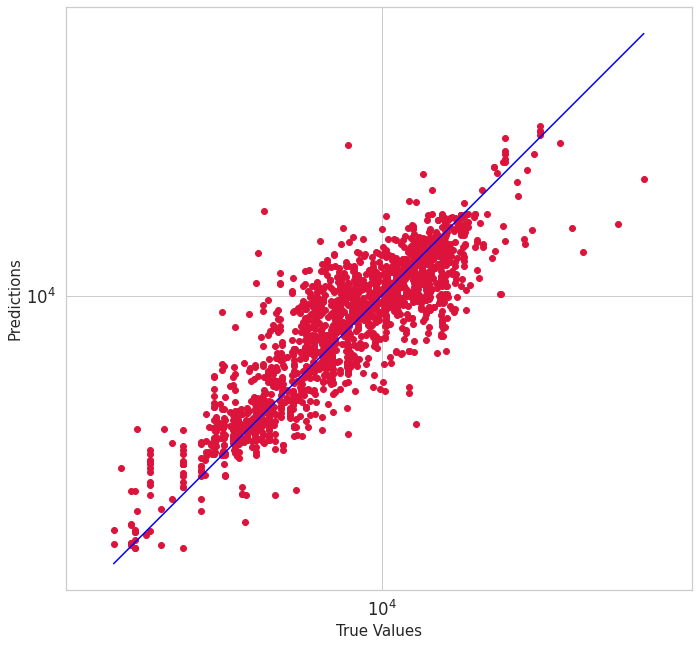

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Comparing different models

In [ ]:
data = pd.DataFrame({"Models" : r2_list.keys(), "R2 Score" : r2_list.values()})
data

,Models,R2 Score
0,logistic_regression,0.070208
1,linear_regression,0.408899
2,decisiontree_regressor,0.606642
3,randomforest_regressor,0.736838
4,gaussian,0.452230
5,bernoulli,0.305129
6,multinomial,-0.060635
7,kneighbors,0.704360


In [ ]:
data1 = pd.DataFrame({"Models" : rmse_list.keys(), "RMSE" : rmse_list.values()})
data1

,Models,RMSE
0,logistic_regression,1.907068e+07
1,linear_regression,1.212389e+07
2,decisiontree_regressor,8.068034e+06
3,randomforest_regressor,5.397633e+06
4,gaussian,1.123513e+07
5,bernoulli,1.425229e+07
6,multinomial,2.175435e+07
7,kneighbors,6.063784e+06


In [ ]:
data2 = pd.DataFrame({"Models" : mae_list.keys(), "MAE" : mae_list.values()})
data2

,Models,MAE
0,logistic_regression,3450.917174
1,linear_regression,2504.714885
2,decisiontree_regressor,1456.873513
3,randomforest_regressor,1269.358818
4,gaussian,2029.251755
5,bernoulli,2607.831072
6,multinomial,3768.561535
7,kneighbors,1454.286008


In [ ]:
data3 = pd.DataFrame({"Models" : mape_list.keys(), "MAPE" : mape_list.values()})
data3

,Models,MAPE
0,logistic_regression,0.517768
1,linear_regression,0.309570
2,decisiontree_regressor,0.164159
3,randomforest_regressor,0.148968
4,gaussian,0.221446
5,bernoulli,0.306433
6,multinomial,0.623403
7,kneighbors,0.167963


# Building Final Model

From this, we infer that the RandomForestRegressor works better than the rest with an accuracy of 0.736838.


We can further improve its performance using ensemble models.

In [ ]:
# Random Forest Classification
array = [10, 50, 100, 200, 500]
for num_trees in array:
  max_features = 5
  kfold = KFold(n_splits=10, random_state=7, shuffle = True)
  model_1 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
  results = cross_val_score(model_1, X, Y, cv=kfold)
  print('num_trees : %f (%f)'%(num_trees, results.mean()))

num_trees : 10.000000 (0.779389)
num_trees : 50.000000 (0.793768)
num_trees : 100.000000 (0.792454)
num_trees : 200.000000 (0.792162)
num_trees : 500.000000 (0.791790)


We infer that the number of trees should be 200 and max_features will be 5.
Thus we will now finalize our model.

In [ ]:
max_features = 5
model_2 = RandomForestRegressor(n_estimators=200, max_features=max_features)
model_2.fit(X, Y)

RandomForestRegressor(max_features=5, n_estimators=200)

In [ ]:
y_pred = model_2.predict(x_test)
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE = ", mean_absolute_error(y_test, y_pred))
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

RMSE =  6109.022923726992
MAE =  5060.498549953204
MAPE =  0.9263837366484018
